## Model Parameter Comparison Plot

Author: Darshan Mandge, Open Brain Institute

Copyright (c) 2025 Open Brain Institute

This notebook creates a log scatter plot and a heatmap of final parameters of an e-model.
For each paramter, scatter plot for sectionlist (somatic, axonal, apical and basal) are plotted.

To plot your own, model, replace the `em_file` variable with the path to the downloaded file from Open Brain Platform

In [20]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.graph_objects as go
import pandas as pd
import numpy as nps
import json
import copy


In [21]:
#em_file="model_files/EM__emodel=cADpyr__etype=cADpyr__mtype=L5_TPC_A__species=mouse__brain_region=grey__iteration=1.json"
em_file="LFPy/cadpyr/EM__emodel=cADpyr__etype=cADpyr__mtype=L5_TPC_A__species=mouse__brain_region=grey__iteration=1372346__13.json"
with open(em_file, "r") as f:
    em = json.load(f)
em.keys()

dict_keys(['fitness', 'parameter', 'score', 'features', 'scoreValidation', 'passedValidation', 'seed'])

Now, we create lists for parameters in the 4 NEURON sectionlists: apical, basal, somatic and axonal. If the e-model you selected/donwloaded has other sectionlsist, the notebook cell below will need appropriate modification

In [22]:
somatic=[]
axonal=[]
basal=[]
apical=[]

param_names_unique = set()

for param_dict in em['parameter']:
    # print(param_dict['name'])
    if 'somatic' in param_dict['name']:
        somatic.append(copy.deepcopy(param_dict))
    if 'axonal' in param_dict['name']:
        axonal.append(copy.deepcopy(param_dict))
    if 'basal' in param_dict['name']:
        basal.append(copy.deepcopy(param_dict))
    if 'apical' in param_dict['name']:
        apical.append(copy.deepcopy(param_dict))
    if '.all' in param_dict['name']:
        somatic.append(copy.deepcopy(param_dict))
        axonal.append(copy.deepcopy(param_dict))
        basal.append(copy.deepcopy(param_dict))
        apical.append(copy.deepcopy(param_dict))
    if '.somadend' in param_dict['name']:
        somatic.append(copy.deepcopy(param_dict))
        basal.append(copy.deepcopy(param_dict))
        apical.append(copy.deepcopy(param_dict))

    param_names_unique.add(param_dict['name'].split('.')[0])

# print the len of each list
print(f"somatic list length = {len(somatic)}")
print(f"axonal list length = {len(axonal)}")
print(f"basal list length = {len(basal)}")
print(f"apical list length = {len(apical)}")
# q. can I convert the set to a list with the same name?
# a. yes, but the order will be different
param_names_unique = list(param_names_unique)
print(f"param_names_unique list length = {len(param_names_unique)}")
print(param_names_unique)

somatic list length = 12
axonal list length = 12
basal list length = 6
apical list length = 10
param_names_unique list length = 13
['gNap_Et2bar_Nap_Et2', 'gNaTgbar_NaTg', 'gCa_LVAstbar_Ca_LVAst', 'gIhbar_Ih', 'gK_Tstbar_K_Tst', 'decay_CaDynamics_DC0', 'gSK_E2bar_SK_E2', 'gamma_CaDynamics_DC0', 'gSKv3_1bar_SKv3_1', 'g_pas', 'gCa_HVAbar_Ca_HVA2', 'e_pas', 'gK_Pstbar_K_Pst']


In [23]:
# group the data by the parameter name and plot a box plot for each parameter
# create a dictionary to hold the data
data_dict = {}
for param_name in param_names_unique:
    data_dict[param_name] = {}
    for temp_dict in somatic:
        if param_name in temp_dict['name']:
            data_dict[param_name]['somatic'] = copy.deepcopy(temp_dict['value'])
    for temp_dict in axonal:
        if param_name in temp_dict['name']:
            data_dict[param_name]['axonal'] = copy.deepcopy(temp_dict['value'])
    for temp_dict in basal:
        if param_name in temp_dict['name']:
            data_dict[param_name]['basal'] = copy.deepcopy(temp_dict['value'])
    for temp_dict in apical:
        if param_name in temp_dict['name']:
            data_dict[param_name]['apical'] = copy.deepcopy(temp_dict['value'])


The dictionary data_dict has all the parameters of the model with the values for 4 sectionlstits.

In [24]:
data_dict

{'gNap_Et2bar_Nap_Et2': {'axonal': 0.003145142219854339},
 'gNaTgbar_NaTg': {'somatic': 0.07645687931426047,
  'axonal': 1.1198683974923498,
  'apical': 0.019917330119200022},
 'gCa_LVAstbar_Ca_LVAst': {'somatic': 0.0006622930104584055,
  'axonal': 0.0018029065747980576,
  'basal': 1.1077694769036426e-05,
  'apical': 0.003978825713989373},
 'gIhbar_Ih': {'somatic': 0.00012632529009518365,
  'basal': 0.00012632529009518365,
  'apical': 0.00012632529009518365},
 'gK_Tstbar_K_Tst': {'somatic': 0.09859584059471482,
  'axonal': 0.027076720343931257},
 'decay_CaDynamics_DC0': {'somatic': 262.2336124221823,
  'axonal': 154.27480997393874,
  'apical': 30.66685006306855},
 'gSK_E2bar_SK_E2': {'somatic': 4.9999997198124646e-11,
  'axonal': 0.04555210215064623,
  'apical': 0.05273696299968331},
 'gamma_CaDynamics_DC0': {'somatic': 0.014308708963482053,
  'axonal': 0.010892943161365895,
  'basal': 0.023817835474555023,
  'apical': 0.0008808813438725832},
 'gSKv3_1bar_SKv3_1': {'somatic': 0.9153961

In [25]:
import plotly.graph_objects as go

# Create a scatter plot using Plotly
fig = go.Figure()
colors = ['red', 'green', 'blue', 'orange']
# Add scatter traces for each compartment
for compartment, color in zip(['somatic', 'axonal', 'basal', 'apical'], colors):
    x = []
    y = []
    for param_name in param_names_unique:
        if compartment in data_dict[param_name]:
            x.append(param_name)
            y.append(data_dict[param_name][compartment])
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers',
        name=compartment,
        marker=dict(color=color)
    ))

# Update layout
fig.update_layout(
    title={'text': 'Parameter values for different compartments', 'x': 0.5},
    xaxis_title='Parameter',
    yaxis_title='Parameter Value',
    yaxis_type='log',
    legend_title='Compartment'
)

fig.show()

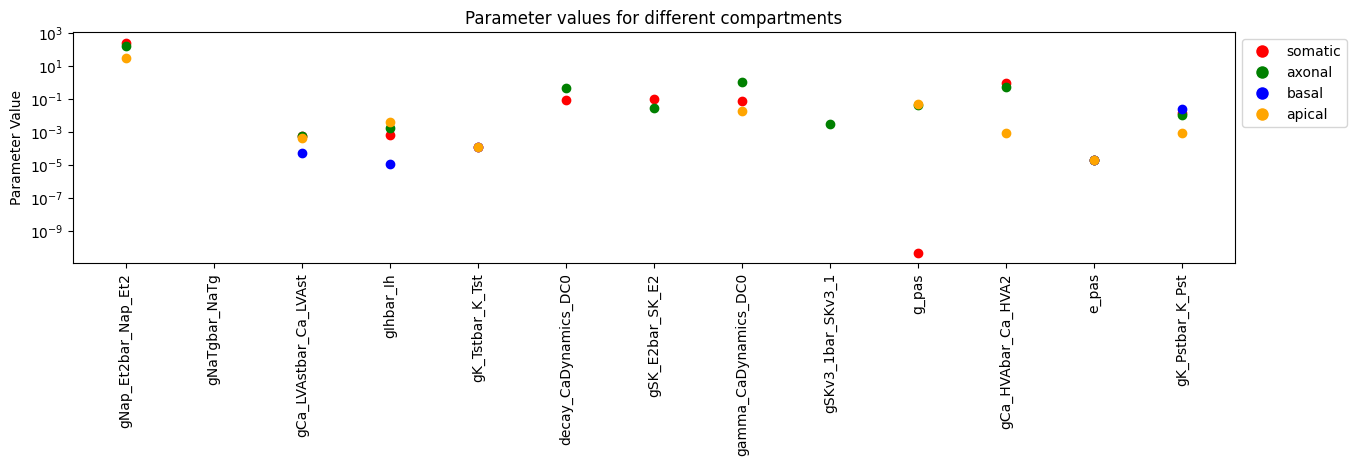

In [26]:
#Same plot using matplotlib: simpler but less interactive

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15, 3))
# use distinct colors for better differentiation
colors = ['red', 'green', 'blue', 'orange']

for i,key in enumerate(sorted(data_dict)):
    # plot the data for each parameter with a different color for each compartment
    for compartment, color in zip(['somatic', 'axonal', 'basal', 'apical'], colors):
        if compartment in data_dict[key]:
            ax.scatter(i, data_dict[key][compartment], color=color, label=compartment)

# set the xticks to the parameter names
ax.set_xticks(range(len(data_dict)))
ax.set_xticklabels(data_dict.keys(), rotation=90)
ax.set_ylabel('Parameter Value')
# log scale for the y-axis
ax.set_yscale('log')
ax.set_title('Parameter values for different compartments')

# Create custom legend handles with the new colors
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, 
                         label=l, markersize=10) 
                  for l, c in zip(['somatic', 'axonal', 'basal', 'apical'], colors)]
ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



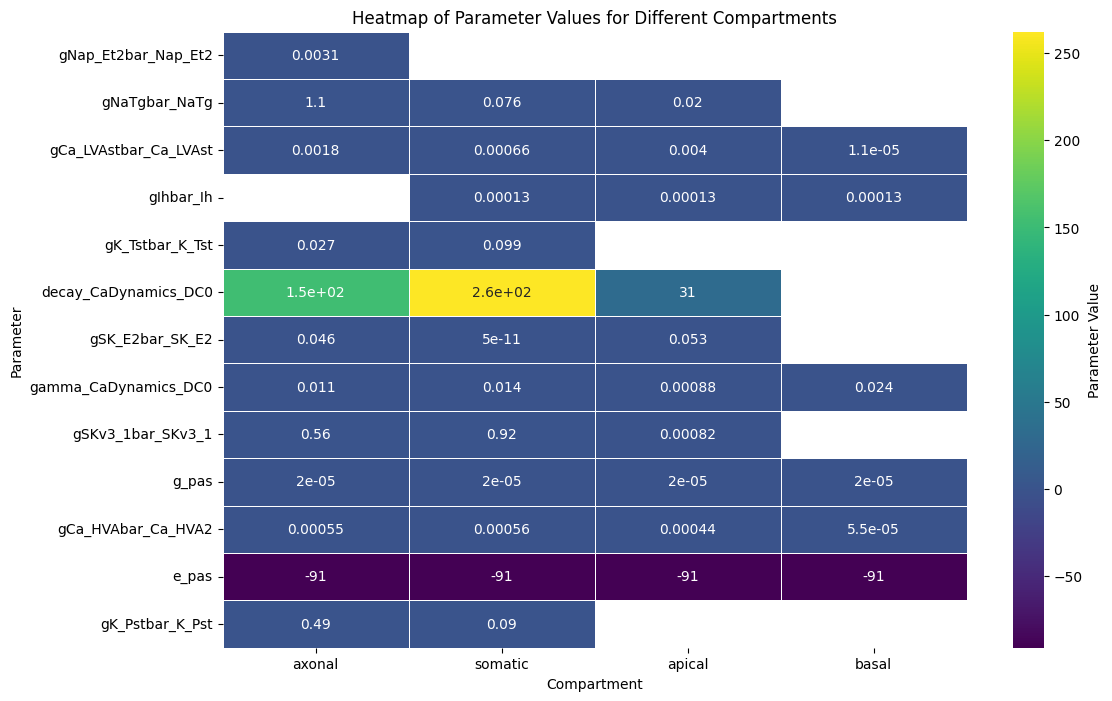

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert the data_dict to a DataFrame
df_heatmap = pd.DataFrame(data_dict).T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True, cmap='viridis', cbar_kws={'label': 'Parameter Value'}, linewidths=.5)
plt.title('Heatmap of Parameter Values for Different Compartments')
plt.xlabel('Compartment')
plt.ylabel('Parameter')
plt.show()